# Baseball Case Study


Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

# importing required libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')

Loading the dataset

In [4]:
df=pd.read_csv("baseball.csv") #reading the file
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [5]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [6]:
df.shape

(30, 17)

In [7]:
df.dtypes #sreaching for data types

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [91]:
num_features=df.select_dtypes(include=['float64','int64']) 
cat_features=df.select_dtypes(include=['O'])

In [92]:
num_features.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [8]:
#checking for null values

In [9]:
df.isnull().sum() #no null values

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [10]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


# Here we check unique values

In [11]:
df['W'].unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

In [12]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [13]:
df['W'].value_counts()

68     3
81     2
74     2
76     2
83     2
80     1
97     1
98     1
67     1
71     1
78     1
79     1
95     1
100    1
92     1
84     1
85     1
86     1
87     1
88     1
90     1
63     1
93     1
64     1
Name: W, dtype: int64

<AxesSubplot:>

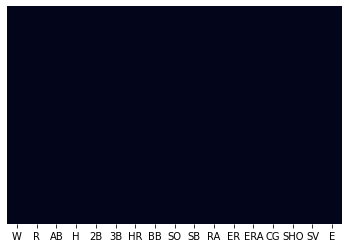

In [15]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False)

In [16]:
import matplotlib.gridspec as gridspec
def numerical_analysis(feature,data):
    fig=plt.figure(constrained_layout=True)
    grid=gridspec.GridSpec(ncols=1,nrows=1,figure=fig)
   # ax1=fig.add_subplot(grid[0,0])
    #sns.distplot(data[feature],ax=ax1)
    #ax2=fig.add_subplot(grid[1,:])
    #sns.countplot(x=feature,data=df,hue='Attrition',ax=ax2)
    ax3=fig.add_subplot(grid[0,0])
    sns.boxplot(x='W',y=feature,data=df,ax=ax3)

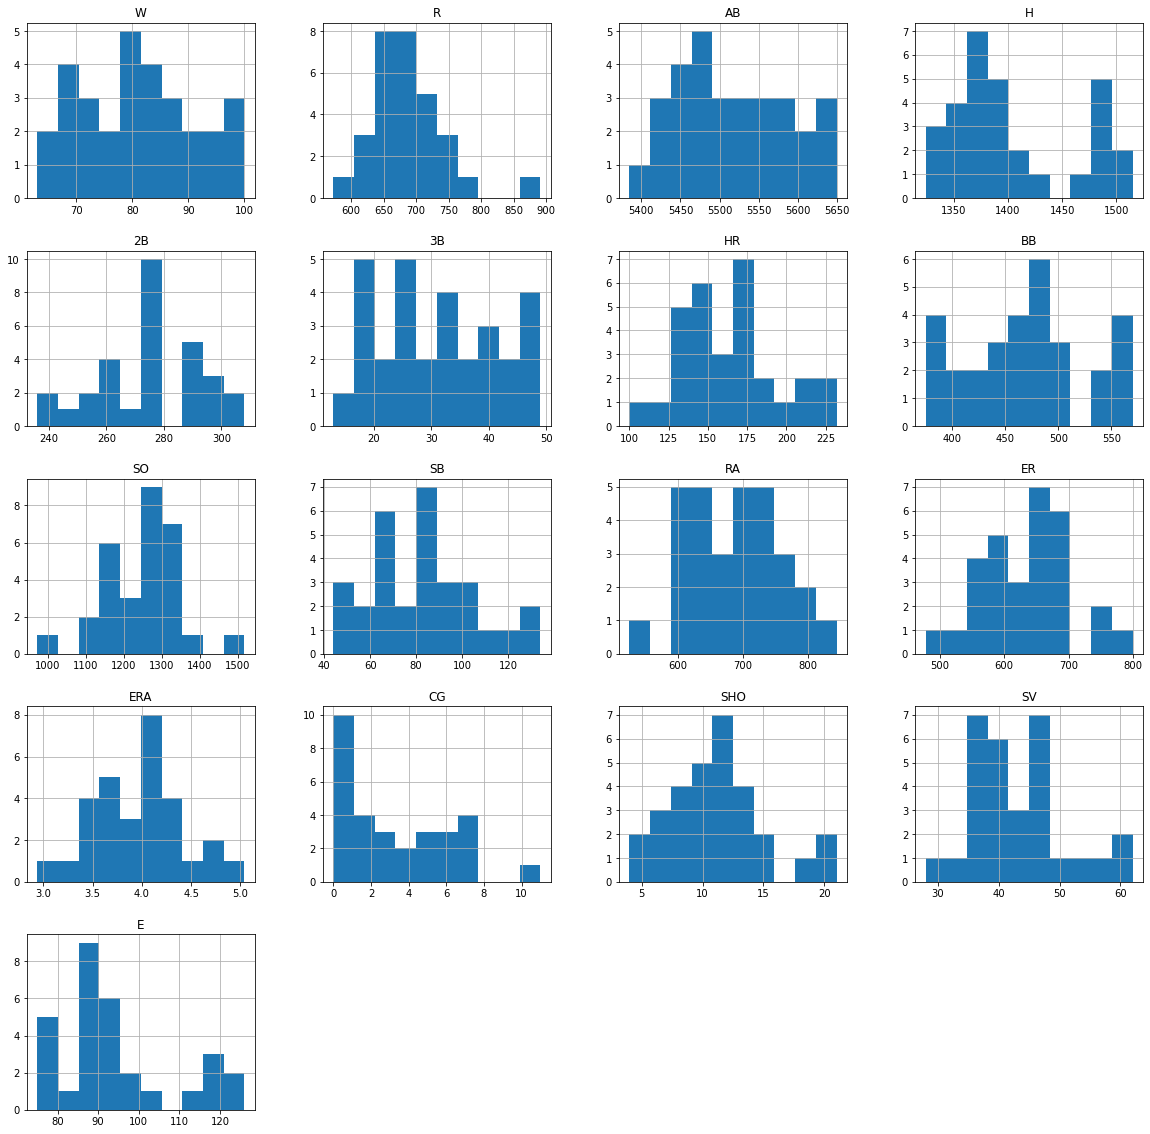

In [17]:
df.hist(figsize = (20,20))
plt.show()

In [93]:
cat_features.columns

Index([], dtype='object')

<AxesSubplot:xlabel='W', ylabel='count'>

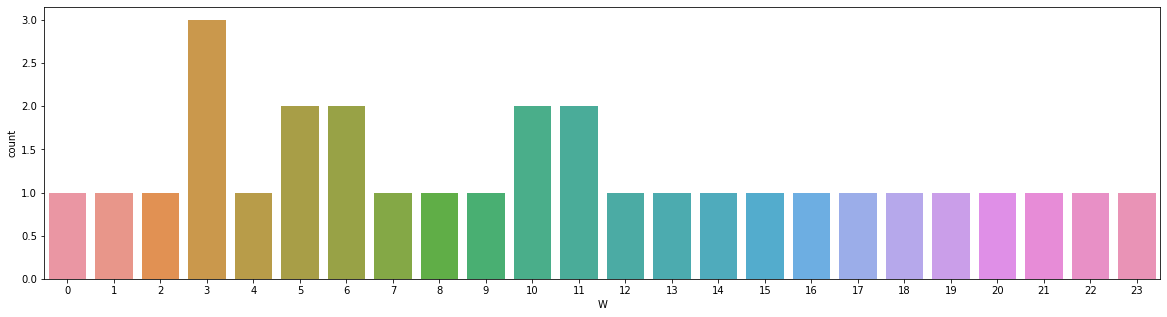

In [68]:
plt.subplots(figsize=(20,5))
sns.countplot(x='W',data=df)

<AxesSubplot:xlabel='R', ylabel='count'>

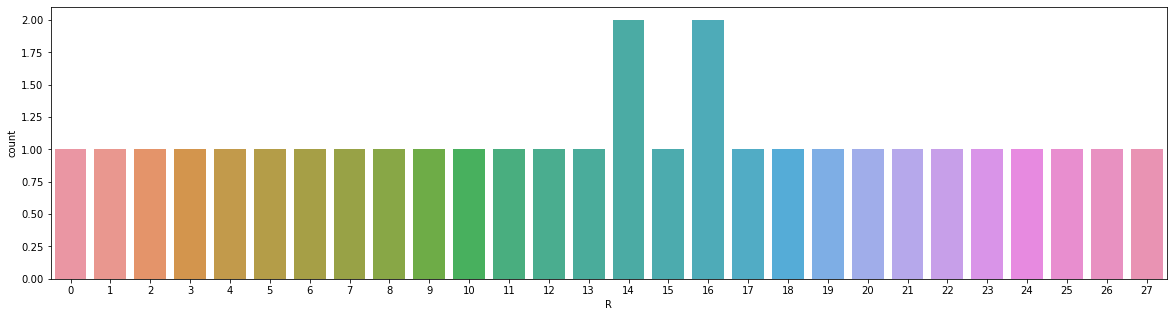

In [69]:
plt.subplots(figsize=(20,5))
sns.countplot(x='R',data=df)

<AxesSubplot:xlabel='AB', ylabel='count'>

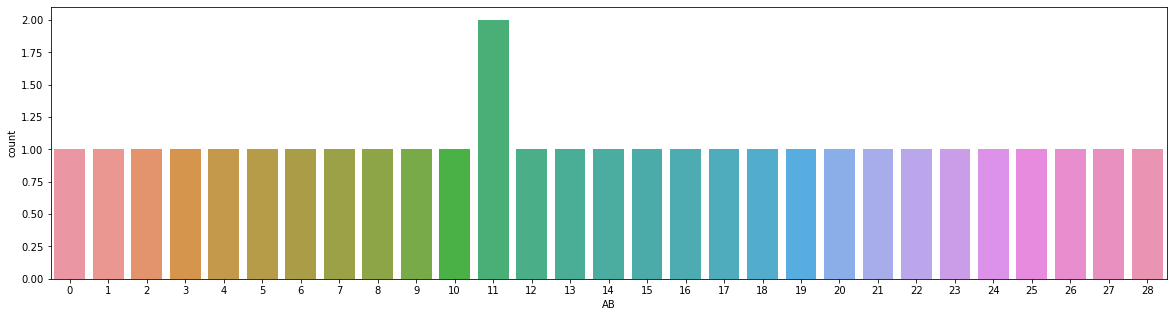

In [70]:
plt.subplots(figsize=(20,5))
sns.countplot(x='AB',data=df)

<AxesSubplot:xlabel='H', ylabel='count'>

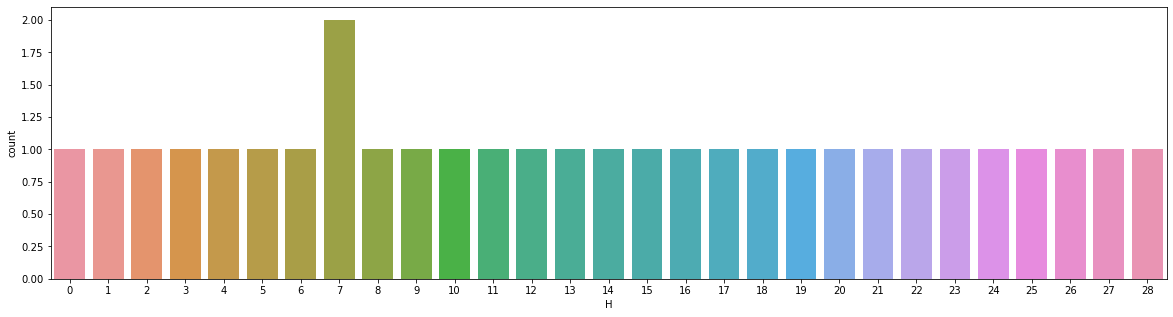

In [71]:
plt.subplots(figsize=(20,5))
sns.countplot(x='H',data=df)

<AxesSubplot:xlabel='2B', ylabel='count'>

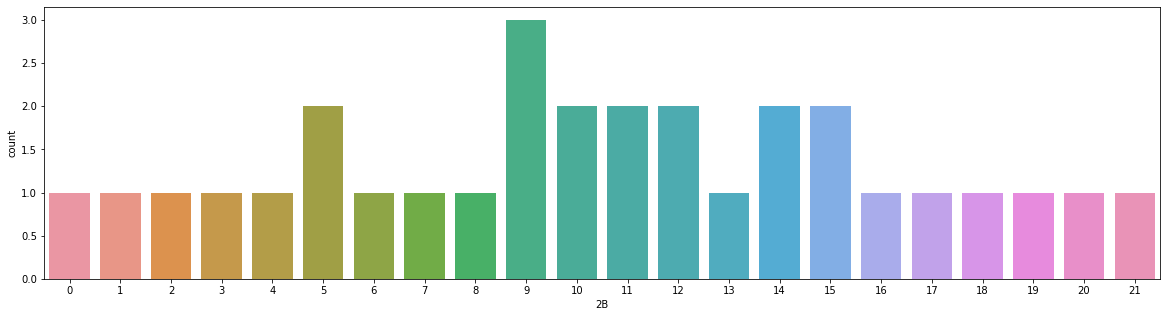

In [72]:
plt.subplots(figsize=(20,5))
sns.countplot(x='2B',data=df)

<AxesSubplot:xlabel='3B', ylabel='count'>

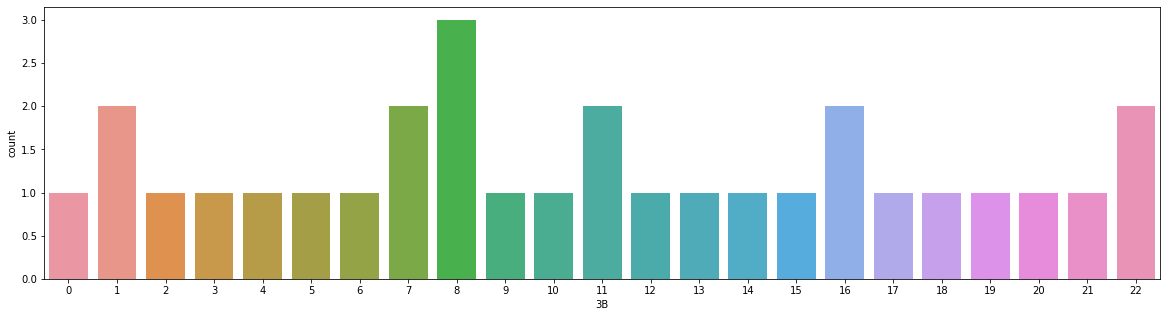

In [73]:
plt.subplots(figsize=(20,5))
sns.countplot(x='3B',data=df)

<AxesSubplot:xlabel='HR', ylabel='count'>

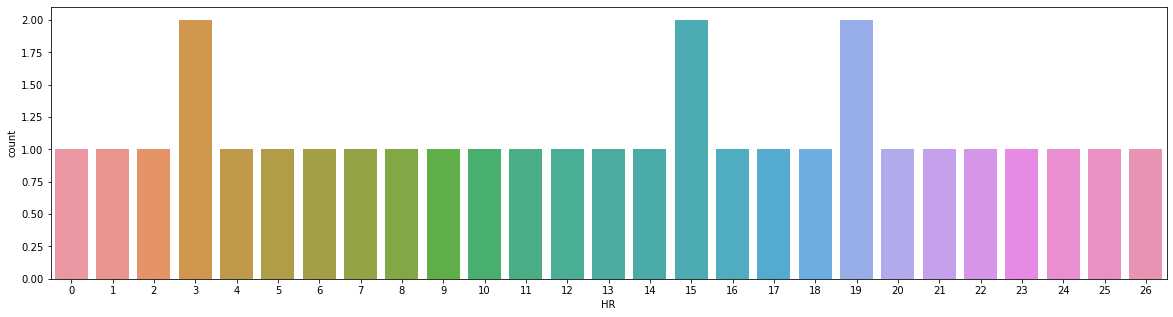

In [74]:
plt.subplots(figsize=(20,5))
sns.countplot(x='HR',data=df)

<AxesSubplot:xlabel='BB', ylabel='count'>

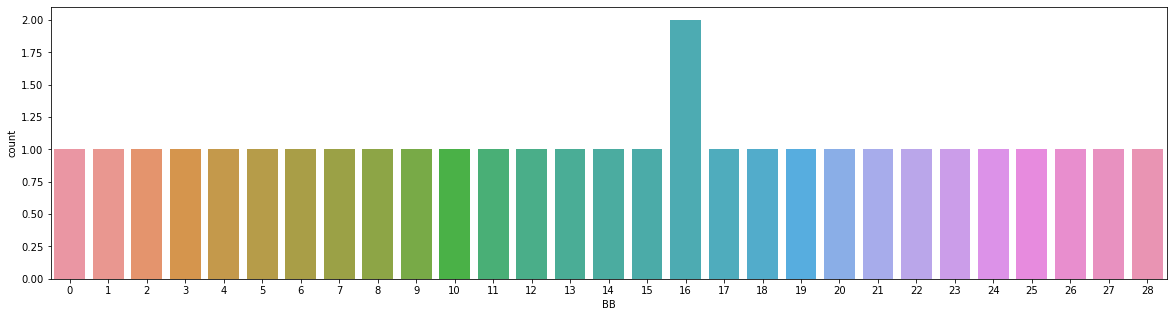

In [75]:
plt.subplots(figsize=(20,5))
sns.countplot(x='BB',data=df)

<AxesSubplot:xlabel='SO', ylabel='count'>

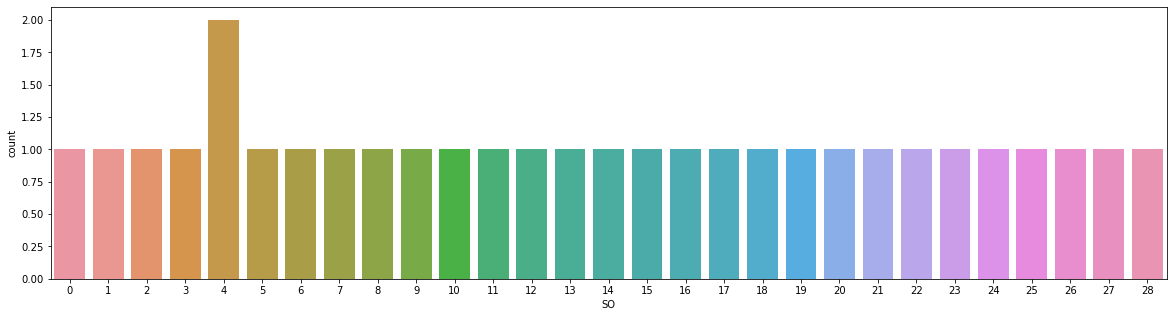

In [76]:
plt.subplots(figsize=(20,5))
sns.countplot(x='SO',data=df)

<AxesSubplot:xlabel='SB', ylabel='count'>

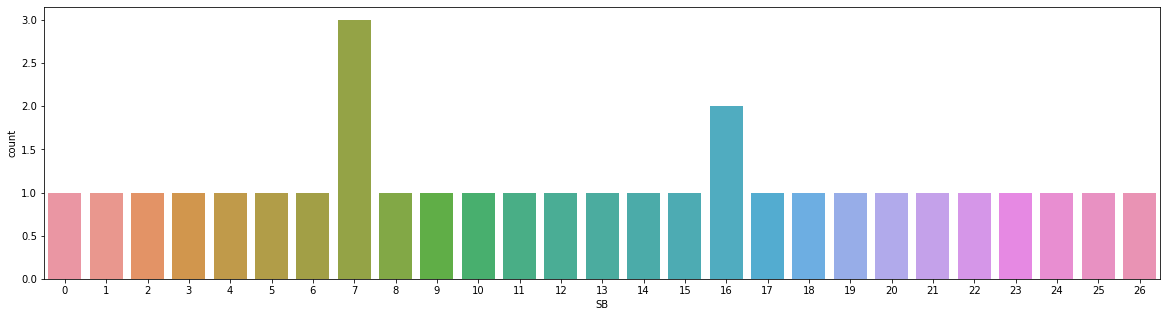

In [77]:
plt.subplots(figsize=(20,5))
sns.countplot(x='SB',data=df)

<AxesSubplot:xlabel='RA', ylabel='count'>

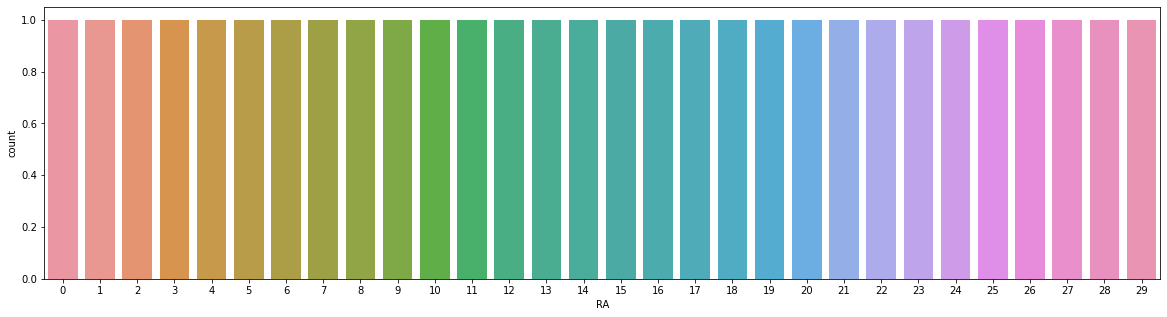

In [78]:
plt.subplots(figsize=(20,5))
sns.countplot(x='RA',data=df)

<AxesSubplot:xlabel='ER', ylabel='count'>

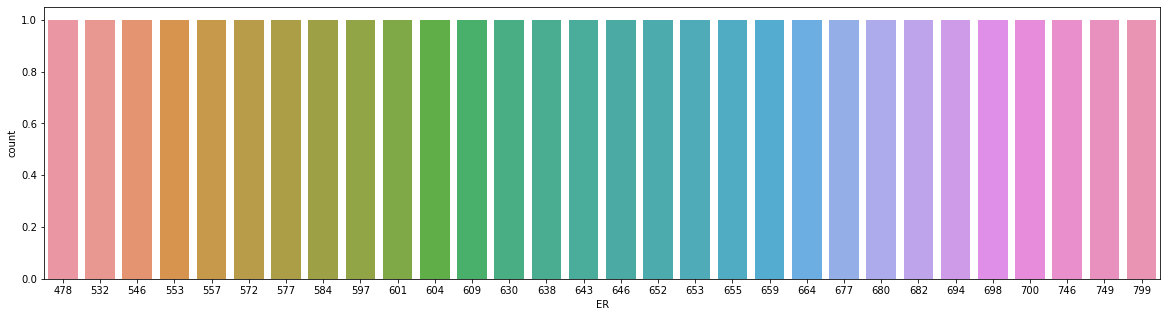

In [67]:
plt.subplots(figsize=(20,5))
sns.countplot(x='ER',data=df)

<AxesSubplot:xlabel='ERA', ylabel='count'>

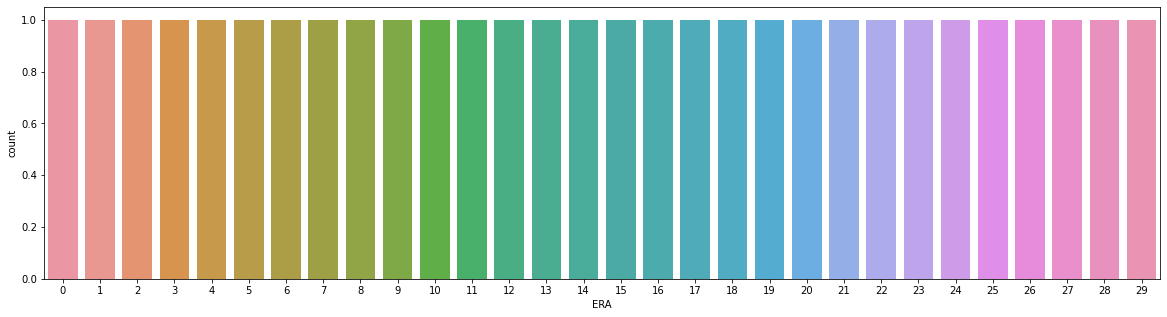

In [79]:
plt.subplots(figsize=(20,5))
sns.countplot(x='ERA',data=df)

<AxesSubplot:xlabel='CG', ylabel='count'>

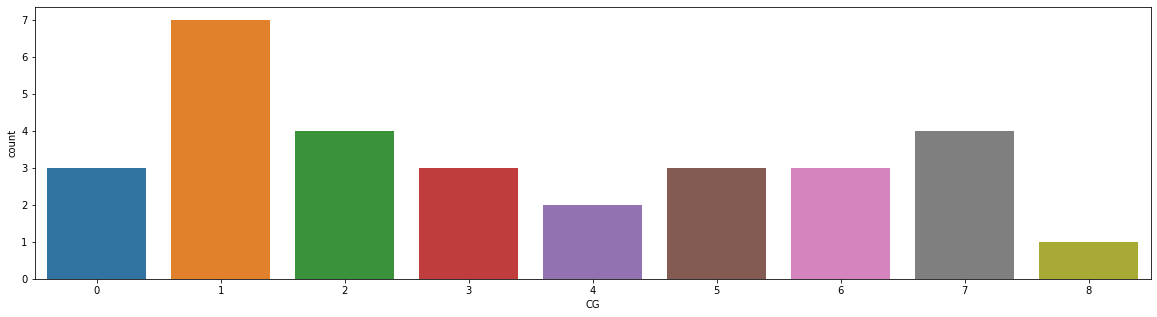

In [80]:
plt.subplots(figsize=(20,5))
sns.countplot(x='CG',data=df)

<AxesSubplot:xlabel='SHO', ylabel='count'>

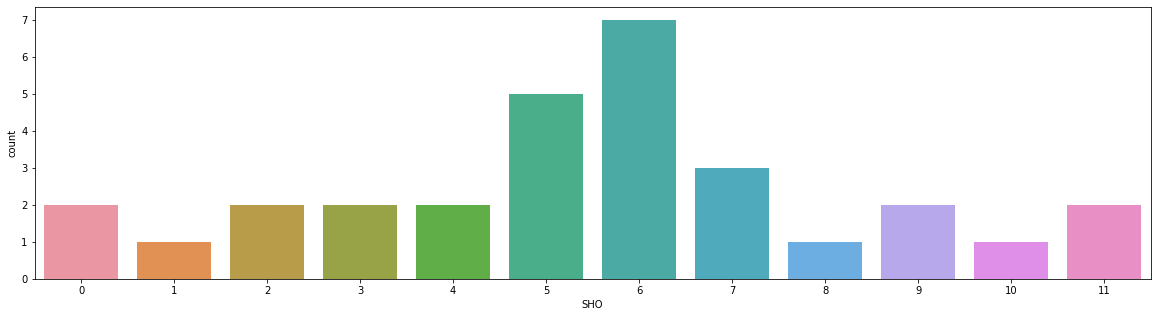

In [81]:
plt.subplots(figsize=(20,5))
sns.countplot(x='SHO',data=df)

<AxesSubplot:xlabel='SV', ylabel='count'>

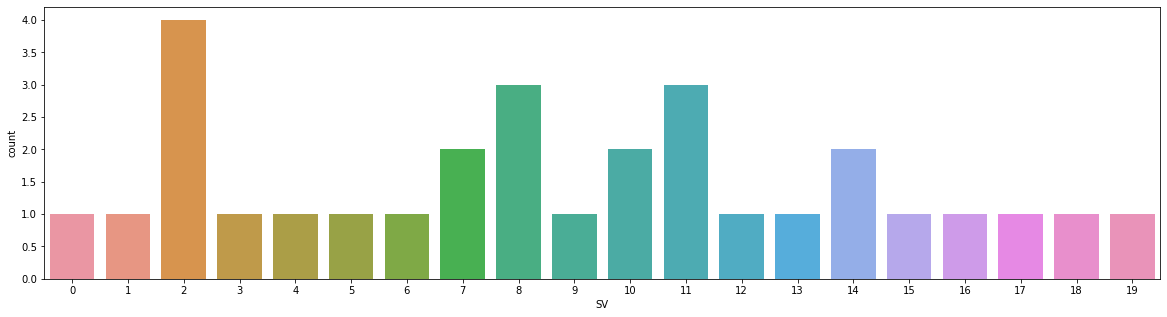

In [82]:
plt.subplots(figsize=(20,5))
sns.countplot(x='SV',data=df)

<AxesSubplot:xlabel='E', ylabel='count'>

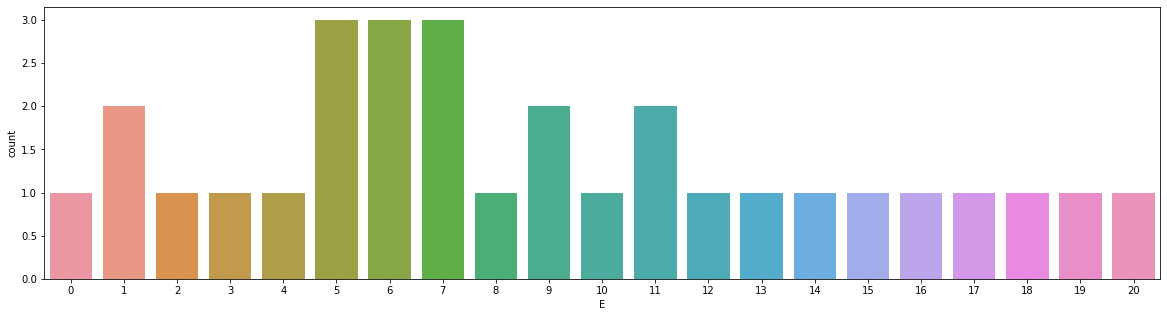

In [83]:
plt.subplots(figsize=(20,5))
sns.countplot(x='E',data=df)

<AxesSubplot:xlabel='W'>

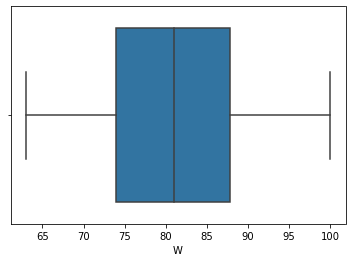

In [47]:
sns.boxplot(df['W'])

<AxesSubplot:xlabel='R'>

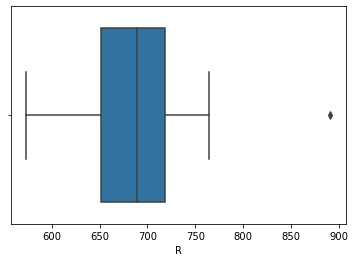

In [48]:
sns.boxplot(df['R'])

<AxesSubplot:xlabel='AB'>

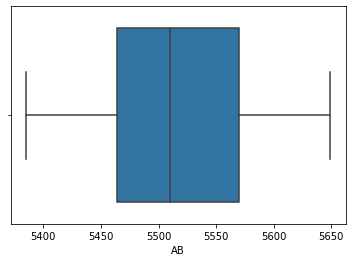

In [49]:
sns.boxplot(df['AB'])

<AxesSubplot:xlabel='H'>

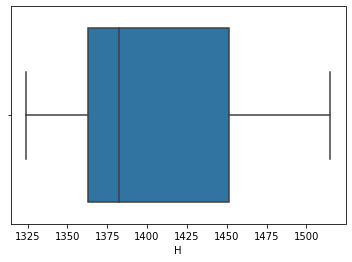

In [50]:
sns.boxplot(df['H'])

<AxesSubplot:xlabel='2B'>

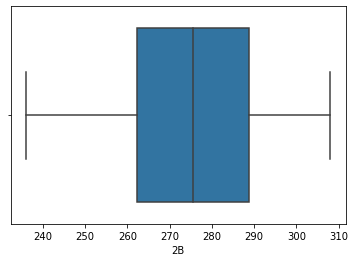

In [51]:
sns.boxplot(df['2B'])

<AxesSubplot:xlabel='3B'>

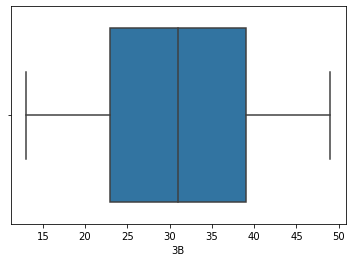

In [52]:
sns.boxplot(df['3B'])

<AxesSubplot:xlabel='HR'>

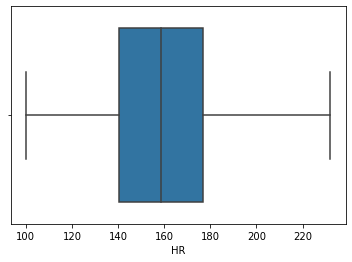

In [53]:
sns.boxplot(df['HR'])

<AxesSubplot:xlabel='BB'>

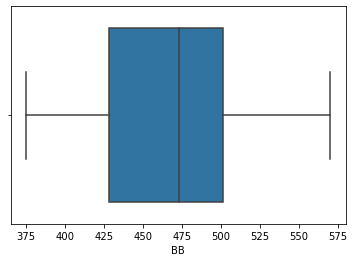

In [54]:
sns.boxplot(df['BB'])

<AxesSubplot:xlabel='SO'>

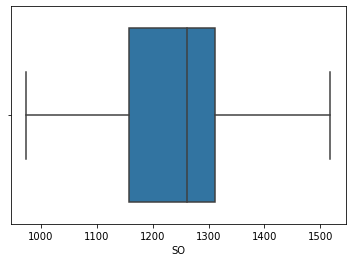

In [55]:
sns.boxplot(df['SO'])

<AxesSubplot:xlabel='SB'>

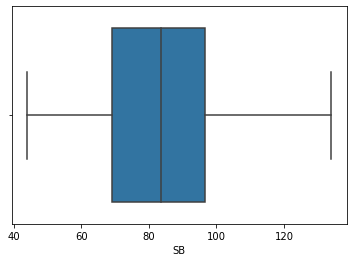

In [56]:
sns.boxplot(df['SB'])

<AxesSubplot:xlabel='RA'>

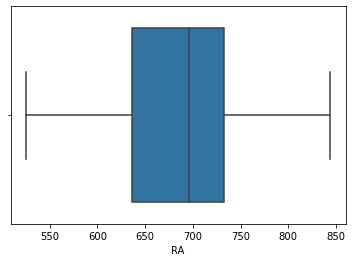

In [57]:
sns.boxplot(df['RA'])

<AxesSubplot:xlabel='ER'>

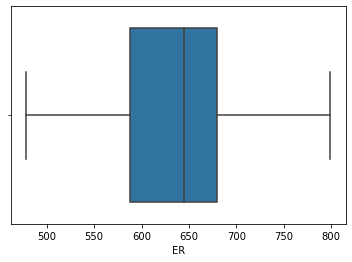

In [58]:
sns.boxplot(df['ER'])

<AxesSubplot:xlabel='ERA'>

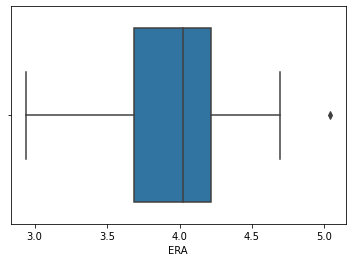

In [59]:
sns.boxplot(df['ERA'])

<AxesSubplot:xlabel='CG'>

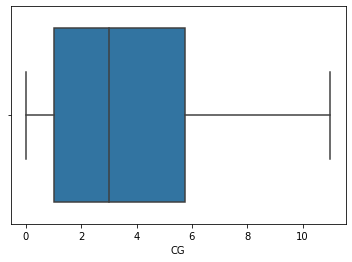

In [60]:
sns.boxplot(df['CG'])

<AxesSubplot:xlabel='ERA'>

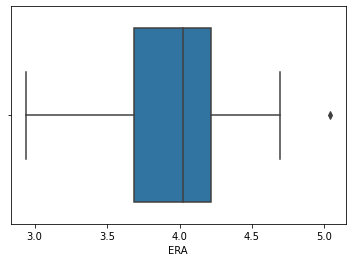

In [62]:
sns.boxplot(df['ERA'])

<AxesSubplot:xlabel='SHO'>

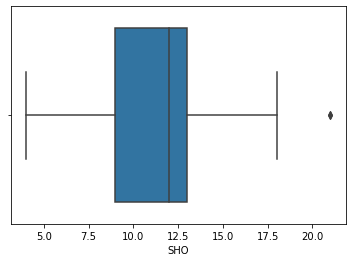

In [63]:
sns.boxplot(df['SHO'])

<AxesSubplot:xlabel='SV'>

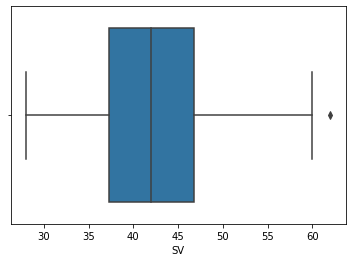

In [64]:
sns.boxplot(df['SV'])

<AxesSubplot:xlabel='E'>

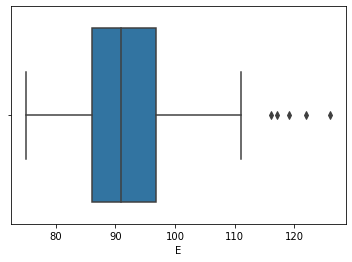

In [65]:
sns.boxplot(df['E'])

In [66]:
from sklearn.preprocessing import LabelEncoder
label= LabelEncoder()
df["W"]=label.fit_transform(df["W"])
df["R"]=label.fit_transform(df["R"])
df["AB"]=label.fit_transform(df["AB"])
df["H"]=label.fit_transform(df["H"])
df["2B"]=label.fit_transform(df["2B"])
df["3B"]=label.fit_transform(df["3B"])
df["HR"]=label.fit_transform(df["HR"])
df["BB"]=label.fit_transform(df["BB"])
df["SO"]=label.fit_transform(df["SO"])
df["SB"]=label.fit_transform(df["SB"])
df["RA"]=label.fit_transform(df["RA"])
df["ERA"]=label.fit_transform(df["ERA"])
df["CG"]=label.fit_transform(df["CG"])
df["SHO"]=label.fit_transform(df["SHO"])
df["SV"]=label.fit_transform(df["SV"])
df["E"]=label.fit_transform(df["E"]) 

In [94]:
from scipy.stats import zscore
z_score=abs(zscore(df))
print("The shape of dataset before removing outliers",df.shape)
df=df.loc[(z_score<3).all(axis=1)]
print("The shape of dataset after removing outliers",df.shape)

The shape of dataset before removing outliers (30, 17)
The shape of dataset after removing outliers (30, 17)


In [95]:
skewness=df.skew()
skewness

W      0.295669
R     -0.039272
AB     0.036646
H      0.067736
2B    -0.025651
3B     0.106250
HR    -0.032359
BB    -0.025085
SO     0.066349
SB     0.092547
RA     0.000000
ER     0.058710
ERA    0.000000
CG     0.325827
SHO   -0.018222
SV     0.122349
E      0.395820
dtype: float64

In [103]:
X=df.drop(['W'],axis=1)
Y=df['ER']
type(X)

pandas.core.frame.DataFrame

In [98]:
from sklearn.preprocessing import power_transform
df_new=power_transform(X)

df_new=pd.DataFrame(df_new,columns=X.columns)
from sklearn.preprocessing import power_transform
df_new.skew

<bound method DataFrame.skew of            R        AB         H        2B        3B        HR        BB  \
0   0.935333  1.067670  1.451410  1.440275  1.054686 -0.997814 -1.735110   
1   0.358692 -0.638018 -1.183363  0.125445  1.179218  0.092347 -0.411484   
2  -0.130235 -1.211777  0.350078  1.597885 -0.181152 -0.700949  1.053228   
3  -1.563009  0.437720 -0.103543 -0.958198 -0.336519 -1.322484 -1.231360   
4   0.117848  1.267402  1.543967  0.796251  1.541867 -0.159743 -0.287451   
5   1.590212 -0.015411  1.070185  1.754290 -1.664760  1.554003  1.558326   
6   1.483412  0.759031  0.457987 -0.223113 -1.218507  1.237270  1.258110   
7   0.708576 -0.255427 -0.604194 -1.564032 -1.022890  1.343945 -0.939795   
8  -1.082216 -0.255427  0.128040  0.296136  0.115997  0.335113 -0.538330   
9   1.267133  1.462865  1.357807  1.121152  0.258782  0.214794  0.299147   
10  1.375733  0.100943  0.668323  0.464722  0.115997  0.570011  0.844091   
11  1.046985 -0.913220 -0.739652  0.296136 -0.497299  1.

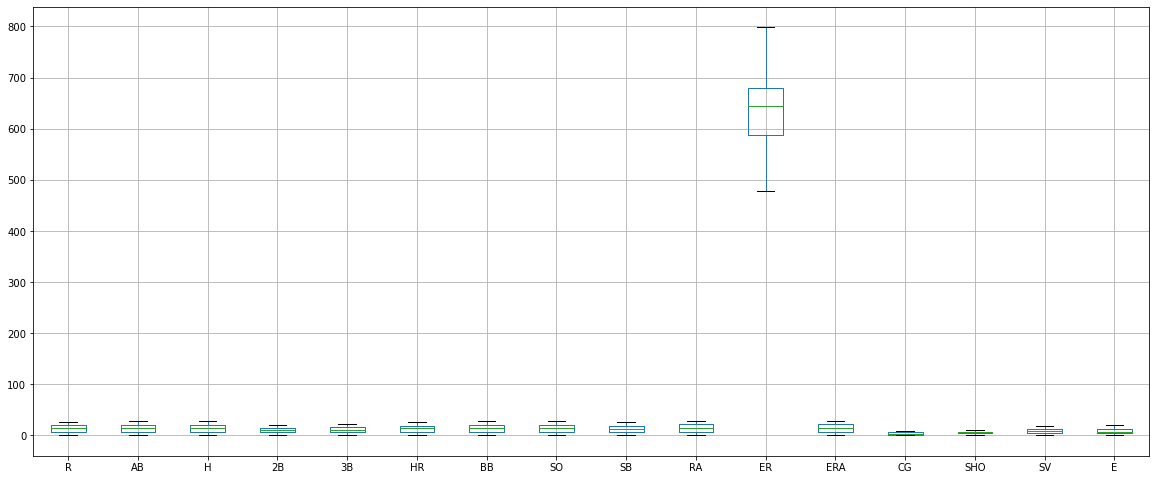

In [101]:
X.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.10)
plt.show()

In [104]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
X_over,Y_over=SM.fit_resample(X,Y)

In [105]:
Y_over.value_counts()

638    1
572    1
643    1
646    1
584    1
652    1
653    1
655    1
659    1
532    1
597    1
664    1
601    1
557    1
604    1
694    1
478    1
799    1
609    1
546    1
677    1
680    1
553    1
746    1
749    1
682    1
700    1
630    1
698    1
577    1
Name: ER, dtype: int64

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [107]:
for i in range(200):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=i)
    from sklearn.tree import DecisionTreeClassifier
    lm= DecisionTreeClassifier()
    lm.fit(X_train,Y_train)
    pred=lm.predict(X_test)
    accu=accuracy_score(Y_test,pred)
    print(accu*100, "at random_state", i)

0.0 at random_state 0
0.0 at random_state 1
0.0 at random_state 2
0.0 at random_state 3
0.0 at random_state 4
0.0 at random_state 5
0.0 at random_state 6
0.0 at random_state 7
0.0 at random_state 8
0.0 at random_state 9
0.0 at random_state 10
0.0 at random_state 11
0.0 at random_state 12
0.0 at random_state 13
0.0 at random_state 14
0.0 at random_state 15
0.0 at random_state 16
0.0 at random_state 17
0.0 at random_state 18
0.0 at random_state 19
0.0 at random_state 20
0.0 at random_state 21
0.0 at random_state 22
0.0 at random_state 23
0.0 at random_state 24
0.0 at random_state 25
0.0 at random_state 26
0.0 at random_state 27
0.0 at random_state 28
0.0 at random_state 29
0.0 at random_state 30
0.0 at random_state 31
0.0 at random_state 32
0.0 at random_state 33
0.0 at random_state 34
0.0 at random_state 35
0.0 at random_state 36
0.0 at random_state 37
0.0 at random_state 38
0.0 at random_state 39
0.0 at random_state 40
0.0 at random_state 41
0.0 at random_state 42
0.0 at random_state 4

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [111]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train, Y_train)
pred = DTC.predict(X_test)
acc=classification_report(Y_test, pred)
print (acc)

              precision    recall  f1-score   support

         532       0.00      0.00      0.00       0.0
         546       0.00      0.00      0.00       1.0
         557       0.00      0.00      0.00       0.0
         572       0.00      0.00      0.00       0.0
         577       0.00      0.00      0.00       0.0
         584       0.00      0.00      0.00       1.0
         601       0.00      0.00      0.00       0.0
         604       0.00      0.00      0.00       1.0
         609       0.00      0.00      0.00       1.0
         646       0.00      0.00      0.00       1.0
         653       0.00      0.00      0.00       0.0
         655       0.00      0.00      0.00       0.0
         659       0.00      0.00      0.00       1.0
         664       0.00      0.00      0.00       1.0
         677       0.00      0.00      0.00       1.0
         694       0.00      0.00      0.00       1.0

    accuracy                           0.00       9.0
   macro avg       0.00   

In [112]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
dc.fit(X,Y)

DecisionTreeClassifier()

In [113]:
RFC = RandomForestClassifier()
RFC.fit(X_train,Y_train)
pred= RFC.predict(X_test)
acc=classification_report(Y_test,pred)
print (acc)

              precision    recall  f1-score   support

         546       0.00      0.00      0.00       1.0
         553       0.00      0.00      0.00       0.0
         577       0.00      0.00      0.00       0.0
         584       0.00      0.00      0.00       1.0
         597       0.00      0.00      0.00       0.0
         604       0.00      0.00      0.00       1.0
         609       0.00      0.00      0.00       1.0
         630       0.00      0.00      0.00       0.0
         646       0.00      0.00      0.00       1.0
         652       0.00      0.00      0.00       0.0
         653       0.00      0.00      0.00       0.0
         659       0.00      0.00      0.00       1.0
         664       0.00      0.00      0.00       1.0
         677       0.00      0.00      0.00       1.0
         680       0.00      0.00      0.00       0.0
         694       0.00      0.00      0.00       1.0

    accuracy                           0.00       9.0
   macro avg       0.00   

In [114]:
SV = SVC()
SV.fit(X_train, Y_train)
pred = SV.predict(X_test)
acc=classification_report(Y_test, pred)
print(acc)

              precision    recall  f1-score   support

         546       0.00      0.00      0.00       1.0
         557       0.00      0.00      0.00       0.0
         584       0.00      0.00      0.00       1.0
         597       0.00      0.00      0.00       0.0
         604       0.00      0.00      0.00       1.0
         609       0.00      0.00      0.00       1.0
         646       0.00      0.00      0.00       1.0
         653       0.00      0.00      0.00       0.0
         659       0.00      0.00      0.00       1.0
         664       0.00      0.00      0.00       1.0
         677       0.00      0.00      0.00       1.0
         680       0.00      0.00      0.00       0.0
         682       0.00      0.00      0.00       0.0
         694       0.00      0.00      0.00       1.0

    accuracy                           0.00       9.0
   macro avg       0.00      0.00      0.00       9.0
weighted avg       0.00      0.00      0.00       9.0

